#**Retriving stock data from Yahoo Finance**

In [12]:
import yfinance as yf

def fetch_stock_data(ticker, period="5d", interval="1m"):
    # Fetch data
    data = yf.download(ticker, period=period, interval=interval)

    # Save to CSV
    csv_file = f"{ticker}_data.csv"
    data.to_csv(csv_file)

    return f"Data saved to {csv_file}"

# To use the function, you would call:
fetch_stock_data("GME")


[*********************100%%**********************]  1 of 1 completed


'Data saved to GME_data.csv'

In [13]:
import pandas as pd

#Loading in the dataset
df = pd.read_csv('GME_data.csv')
df.head(), df.describe(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Datetime   1946 non-null   object 
 1   Open       1946 non-null   float64
 2   High       1946 non-null   float64
 3   Low        1946 non-null   float64
 4   Close      1946 non-null   float64
 5   Adj Close  1946 non-null   float64
 6   Volume     1946 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 106.5+ KB


(                    Datetime       Open       High        Low      Close  \
 0  2024-05-20 09:30:00-04:00  21.540001  21.790001  21.210100  21.510000   
 1  2024-05-20 09:31:00-04:00  21.540001  21.690001  21.171000  21.379999   
 2  2024-05-20 09:32:00-04:00  21.340000  21.469999  21.200001  21.420000   
 3  2024-05-20 09:33:00-04:00  21.430000  22.000000  21.389999  22.000000   
 4  2024-05-20 09:34:00-04:00  21.947100  22.150000  21.930000  21.940001   
 
    Adj Close   Volume  
 0  21.510000  4530331  
 1  21.379999   270818  
 2  21.420000   223843  
 3  22.000000   339084  
 4  21.940001   410114  ,
               Open         High          Low        Close    Adj Close  \
 count  1946.000000  1946.000000  1946.000000  1946.000000  1946.000000   
 mean     20.228067    20.293280    20.164102    20.226156    20.226156   
 std       1.272444     1.291581     1.258053     1.273491     1.273491   
 min      17.711700    17.799999    17.700001    17.719900    17.719900   
 25%      

# **Data Overview**

After loading in the dataset for GameStop stock prices data by the minute containing 1816 entries (could change if you use this notebook after a certain time period).

Columns which are included in this dataset:
*   DateTime: The date and time of the stock data
*   Open: The starting price of the stock at that beginning minute.
*   High: The highest price of the stock during the minute.
*   Low: The lowest price of the stock during the minute.
*   Close: The closing price of the stock at the end of the minute.
*   Adj Close:The adjusted closing price of the stock.
*   Volume: The volume of stock traded during the minute.









# **Summary Statistics**

*   **Open, High, Low, Close, Adj Close:**
  *   It has a range of approximately between 19.8 (1 decimal place) and 64.8 (1 decimal place).
  *   Mean prices range from 32.2 (1 decimal place) to 32.5 (1 decimal place)

*   **Volume**:
  *   Ranges from 1,240 to 48,123,980
  *   Has an average volume of 364,401.





# **Data Quality Check**

In [14]:
df.isnull().any()

Datetime     False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

There appears to be no missing (null) values contained within the dataset.

The 'Datetime' column I will need to convert into datetime type in order to perform any time series analysis.

# **Converting Datetime column into the correct datatype**

In [15]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype                    
---  ------     --------------  -----                    
 0   Datetime   1946 non-null   datetime64[ns, UTC-04:00]
 1   Open       1946 non-null   float64                  
 2   High       1946 non-null   float64                  
 3   Low        1946 non-null   float64                  
 4   Close      1946 non-null   float64                  
 5   Adj Close  1946 non-null   float64                  
 6   Volume     1946 non-null   int64                    
dtypes: datetime64[ns, UTC-04:00](1), float64(5), int64(1)
memory usage: 106.5 KB


(None,
                    Datetime       Open       High        Low      Close  \
 0 2024-05-20 09:30:00-04:00  21.540001  21.790001  21.210100  21.510000   
 1 2024-05-20 09:31:00-04:00  21.540001  21.690001  21.171000  21.379999   
 2 2024-05-20 09:32:00-04:00  21.340000  21.469999  21.200001  21.420000   
 3 2024-05-20 09:33:00-04:00  21.430000  22.000000  21.389999  22.000000   
 4 2024-05-20 09:34:00-04:00  21.947100  22.150000  21.930000  21.940001   
 
    Adj Close   Volume  
 0  21.510000  4530331  
 1  21.379999   270818  
 2  21.420000   223843  
 3  22.000000   339084  
 4  21.940001   410114  )

Now that the 'Datetime' column has been converted to the correct datatype. We can proceed with the data vizualizations

# **Data visualization**

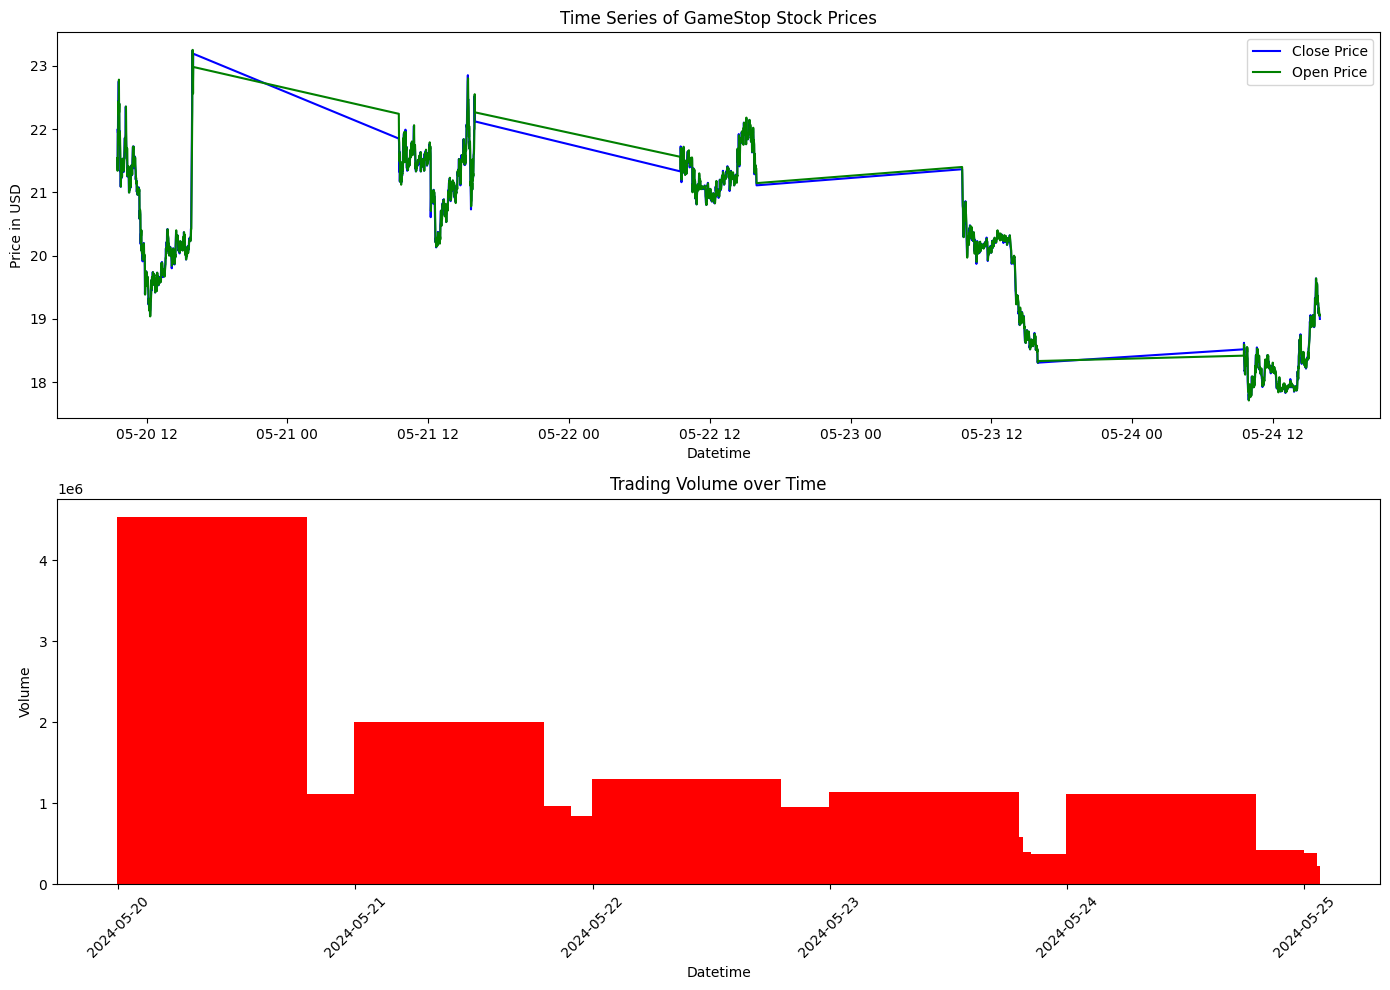

In [16]:
import matplotlib.pyplot as plt

# Plotting time series data for stock prices and volume
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plotting the stock prices
ax1.plot(df['Datetime'], df['Close'], label='Close Price', color='blue')
ax1.plot(df['Datetime'], df['Open'], label='Open Price', color='green')
ax1.set_title('Time Series of GameStop Stock Prices')
ax1.set_xlabel('Datetime')
ax1.set_ylabel('Price in USD')
ax1.legend()

# Plotting the trading volume
ax2.bar(df['Datetime'], df['Volume'], color='Red')
ax2.set_title('Trading Volume over Time')
ax2.set_xlabel('Datetime')
ax2.set_ylabel('Volume')
ax2.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()

1.   Time Series of GameStop Stock Price:
  *   The first graph shows a time series of the opening and closing stock prices. Since there are fluctuations over time, which can be due to volatility or trading opportunities.
2.   Trading Volume over Time:
  *   Shows the trading volume. The spikes in volume could correlate with the significant price changes or external market events.



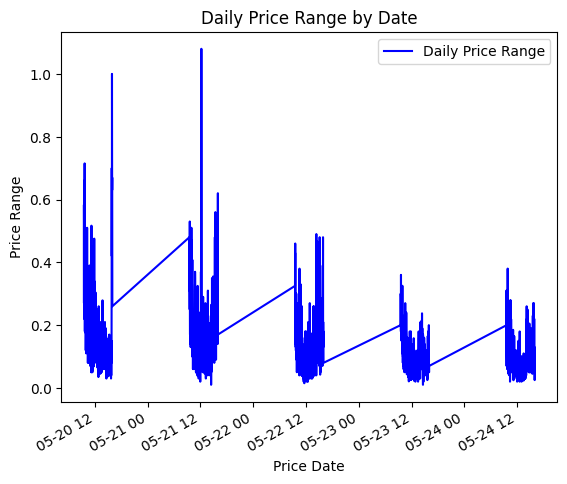

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has been loaded correctly
price_date = df['Datetime']

# Calculate the price range for each day
price_range = df['High'] - df['Low']

# Plotting the timeseries graph of the price range
plt.plot(price_date, price_range, color='blue', label='Daily Price Range')

# Giving title to the graph
plt.title('Daily Price Range by Date')

# Rotating the x-axis tick labels at 30 degrees to the right
plt.xticks(rotation=30, ha='right')

# Giving x and y label to the graph
plt.xlabel('Price Date')
plt.ylabel('Price Range')

# Adding a legend
plt.legend()

# Show the plot
plt.show()


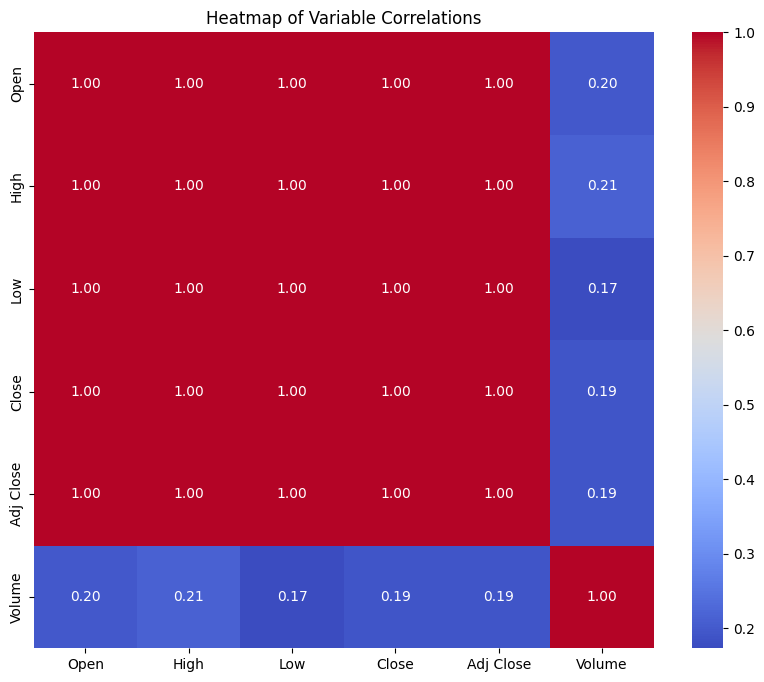

In [18]:
import seaborn as sns

# First, let's ensure the datetime is set as the index for heatmap compatibility
df.set_index('Datetime', inplace=True)

# Create a heatmap for all variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Variable Correlations')
plt.show()


The red area of the heatmap indicates a perfect correlation (1.00) between Open, High, Low, Close, Adjusted Close prices. Which shows that these values are in perfect correlation throughtout the time anaylzed.

The blue area of the heatmap shows a lower correlation between volume and other variables. It suggests that these volume of shares traded are not predictable by the price movements on the same day. The trading volume can be influenced by factors such as market news and external economic events etc, which aren't directly reflected in the price values themselves.

---





# **Linear regression model**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define features and target variable for linear regression
features_lr = df[['Open']]
target_lr = df['Close']

# Split the data into training and testing sets
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(features_lr, target_lr, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_lr, y_train_lr)

# Make predictions on the test set
y_pred_lr = linear_model.predict(X_test_lr)

# Evaluate the Linear Regression model's performance
mae_lr = mean_absolute_error(y_test_lr, y_pred_lr)
mse_lr = mean_squared_error(y_test_lr, y_pred_lr)
rmse_lr = mean_squared_error(y_test_lr, y_pred_lr, squared=False)

mae_lr, mse_lr, rmse_lr

(0.0634073563830169, 0.010398946970340689, 0.10197522723848518)

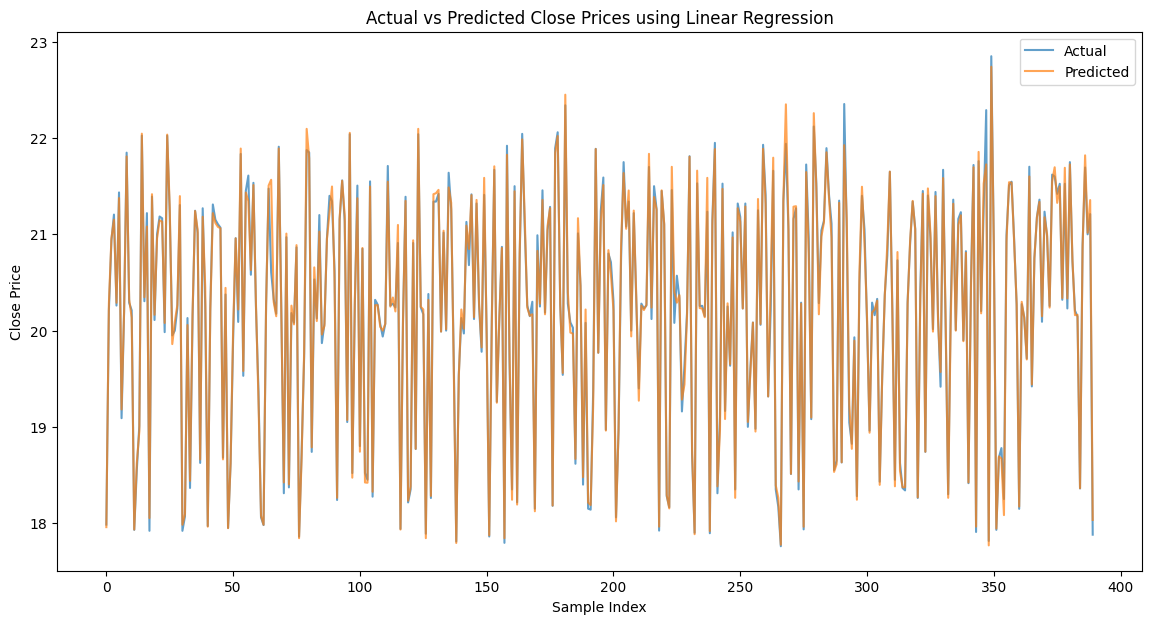

In [20]:
# Plotting the actual vs predicted values for Linear Regression
plt.figure(figsize=(14, 7))
plt.plot(y_test_lr.values, label='Actual', alpha=0.7)
plt.plot(y_pred_lr, label='Predicted', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices using Linear Regression')
plt.legend()
plt.show()


The orange line represents the predicted and the blue line represents actual values.

The linear regression model tends to underpredict the closing prices, therefore for most data points, the actual closing price is higher than the actual predicted price.

There is more variability in the actual closing prices (blue line) than in the predicted closing prices (orange line). Since linear regression models tend to fit straight line to the data, which may not capture all the ups and downs of the actual closing prices.

Therefore, the linear regression model may not be suitable for the closing prices data in this dataset. The model shows a bias towards underprediction and doesn't capture the full variability of actual stock prices.

# **A Comparative Analysis of Model Predictions and Actual Stock Prices**

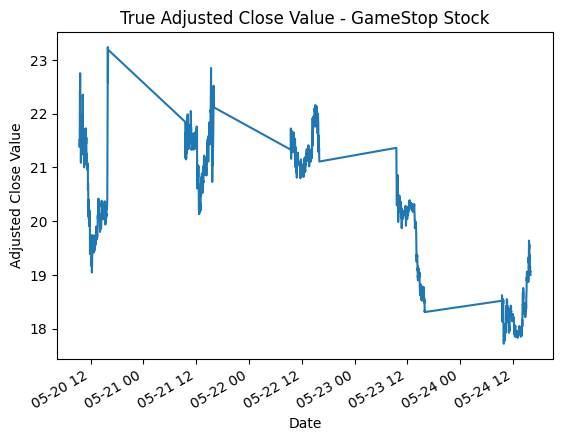

In [21]:
# Plot the True Adj Close Value
df['Adj Close'].plot()
plt.title("True Adjusted Close Value - GameStop Stock")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Value")
plt.show()


Before creating the predictions for the adjusted close value.

Train MSE: 0.01333466132455243
Test MSE: 0.005163333327425225


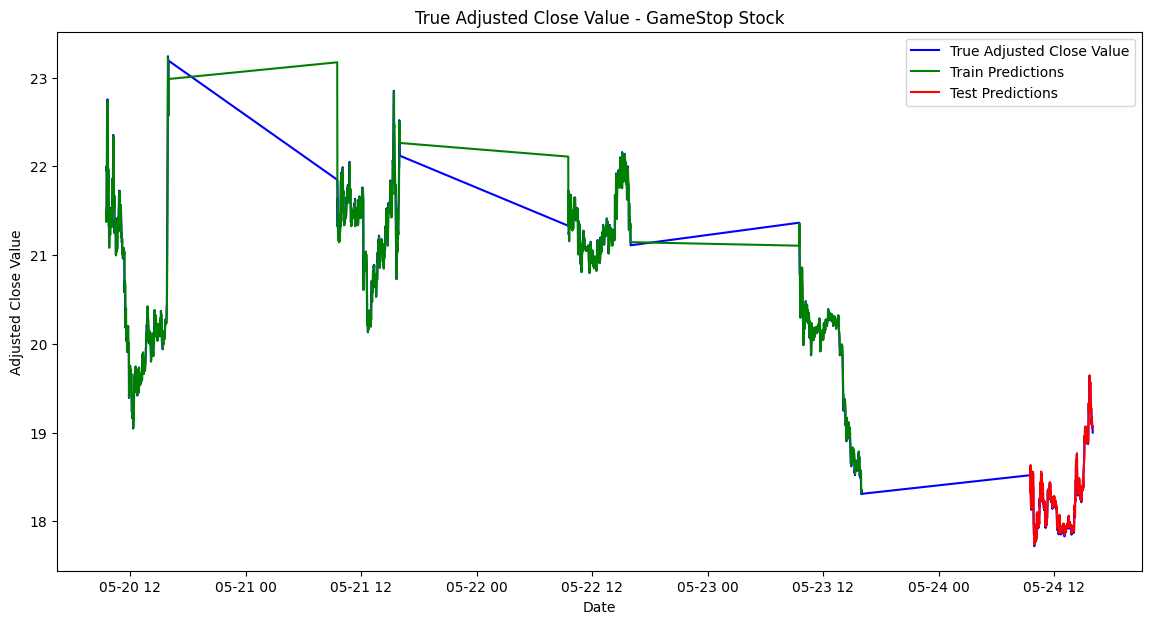

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assume `df` is your DataFrame containing the 'Adj Close' column
# Ensure 'Date' is the index of the DataFrame and it's in DateTime format
# df = pd.read_csv('your_data.csv', index_col='Date', parse_dates=True)

# Create features - for simplicity, let's use the lagged values of 'Adj Close'
df['Adj Close Lag1'] = df['Adj Close'].shift(1)
df = df.dropna()

# Split data into training and test sets
X = df[['Adj Close Lag1']]
y = df['Adj Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate the mean squared error
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Adj Close'], label='True Adjusted Close Value', color='blue')
plt.plot(X_train.index, y_pred_train, label='Train Predictions', color='green')
plt.plot(X_test.index, y_pred_test, label='Test Predictions', color='red')
plt.title("True Adjusted Close Value - GameStop Stock")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Value")
plt.legend()
plt.show()


This graph above focuses on the adjusted close values of GameStop Stock.

The x axis represents the date and time from May 20 to May 24.

The y axis represents the adjusted close values of the stock. Which range from 18 to 23.

The blue line represents the acutal adjusted close values of the stock.

The green line represents the model's predictions for the training dataset. These predictions cover the earlier part of the dataset.

The red line represents the model's preductions for the testing dataset. These predictions cover the later part of the dataset.

Overall the graph shows how the models predictions align wth the true adjusted close values for both training and testing periods. The green and red line indicate how well the model is performing in terms of predicting the stock prices during the respective periods.






# **Conclusion**

To conclude my data analysis project, it is clear that based on the Gamestop stock value. It is clear that it is a volatile, meaning that the rate at which the price of a stock increases or decreases over a particular period. Higher stock price volatility often means higher risk and helps an investor to estimate the fluctuations that may happen in the future. It is advised with these types of stocks you ask a financial advisor or do some research to decide whether to invest in volatile stocks.